# 1.Perform polynomial regression for any given dataset and predict the result for any 2 values with different degrees of the polynomial.You can choose any dataset or else create one with minimum 10 values(x and y).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab/Position_Salaries.csv')

In [ ]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
df = df.drop(columns='Position')

In [ ]:
X = df[['Level']]
y = df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

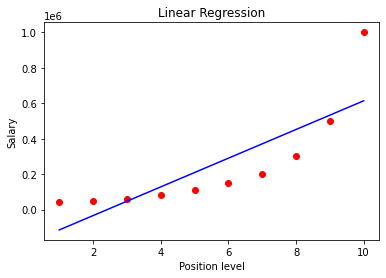

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


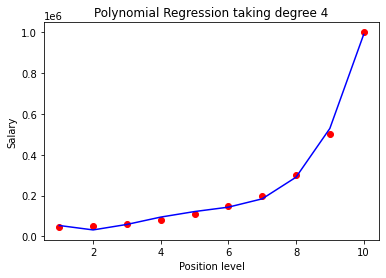

In [ ]:
# Fitting Polynomial Regression to the dataset with deg 4
from sklearn.preprocessing import PolynomialFeatures
poly_reg4 = PolynomialFeatures(degree=4)
X_poly4 = poly_reg4.fit_transform(X)
pol_reg4 = LinearRegression()
pol_reg4.fit(X_poly4, y)

# Visualizing the Polymonial Regression results

plt.scatter(X, y, color='red')
plt.plot(X, pol_reg4.predict(poly_reg4.fit_transform(X)), color='blue')
plt.title( 'Polynomial Regression taking degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Predicting a new result with Polymonial Regression
pol_reg4.predict(poly_reg4.fit_transform([[5.5]]))

array([132148.43750002])

In [ ]:
# Predicting a new result with Polymonial Regression
pol_reg4.predict(poly_reg4.fit_transform([[77]]))

array([2.47778333e+10])

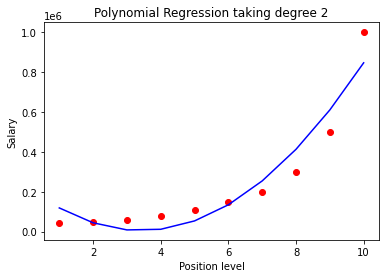

In [ ]:
# Fitting Polynomial Regression to the dataset with deg 2
from sklearn.preprocessing import PolynomialFeatures
poly_reg2 = PolynomialFeatures(degree=2)
X_poly2 = poly_reg2.fit_transform(X)
pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly2, y)

# Visualizing the Polymonial Regression results

plt.scatter(X, y, color='red')
plt.plot(X, pol_reg2.predict(poly_reg2.fit_transform(X)), color='blue')
plt.title( 'Polynomial Regression taking degree 2')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Predicting a new result with Polymonial Regression
pol_reg2.predict(poly_reg2.fit_transform([[5.5]]))

array([89187.5])

In [ ]:
# Predicting a new result with Polymonial Regression
pol_reg2.predict(poly_reg2.fit_transform([[77]]))

array([1.05212333e+08])

# 2. Brief about all the types of regression with its intuition and its diagram in a word document.


#Linear Regression
 A linear regression refers to a regression model that is completely made up of linear variables.   

*   Single Variable Linear Regression is a technique used to model the relationship between a single input independent variable (feature variable) and an output dependent variable using a linear model i.e a line.
*   In Multi-Variable Linear Regression a model is created for the relationship between multiple independent input variables (feature variables) and an output dependent variable. The model remains linear in that the output is a linear combination of the input variables. We can model a multi-variable linear regression as the following:
Y = a_1*X_1 + a_2*X_2 + a_3*X_3 ……. a_n*X_n + b
Where a_n are the coefficients, X_n are the variables and b is the bias. 

 Check out the illustration below for a more visual picture!





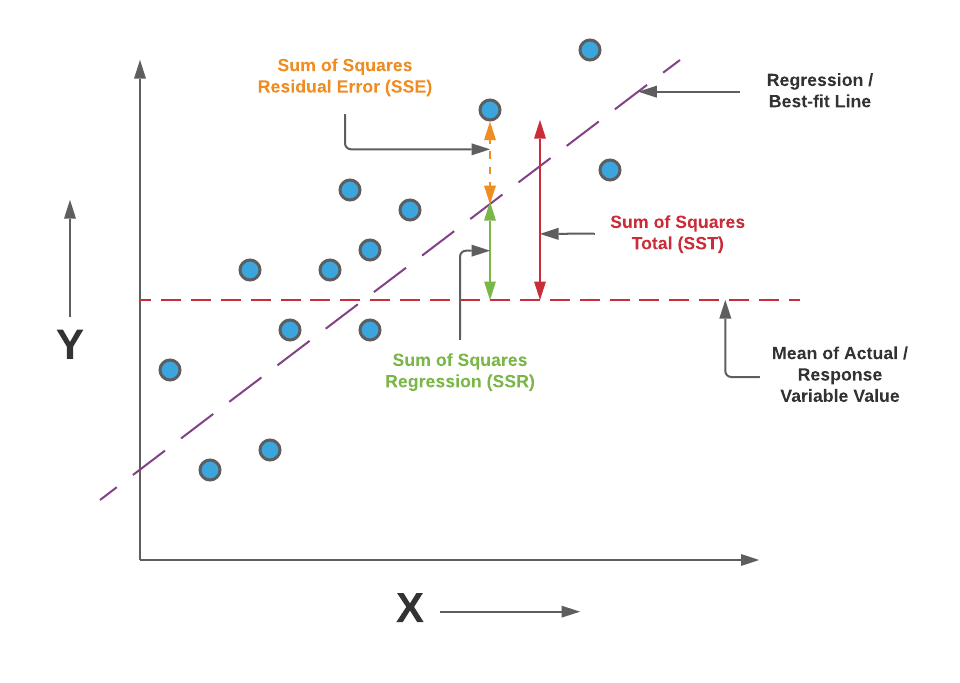

> Illustration of how Gradient Descent find the optimal parameters for a Linear Regression



A few key points about Linear Regression:
* Fast and easy to model  
* Is particularly useful when the relationship to be modeled is not extremely complex and if you don’t have a lot of data.
* Very intuitive to understand and interpret.
* Linear Regression is very sensitive to outliers.

# Polynomial Regression
 In this regression technique, the best fit line is not a straight line. It is rather a curve that fits into the data points. For a polynomial regression, the power of some independent variables is more than 1. For example, we can have something like:
Y = a_1*X_1 + (a_2)²*X_2 + (a_3)⁴*X_3 ……. a_n*X_n + b


We can have some variables have exponents, others without, and also select the exact exponent we want for each variable. However, selecting the exact exponent of each variable naturally requires some knowledge of how the data relates to the output. 





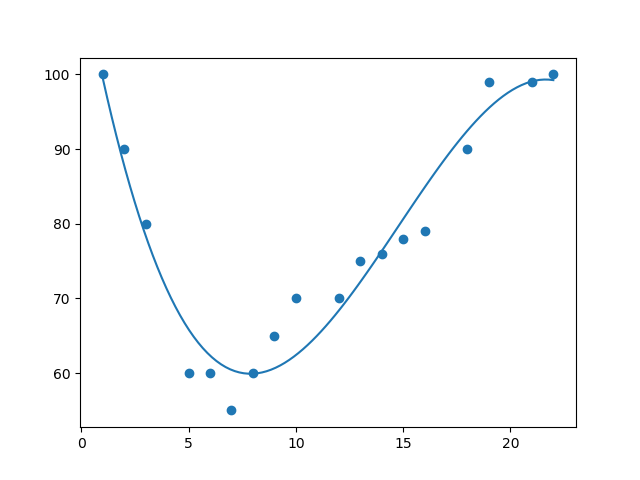




> #  Linear vs Polynomial Regression with data that is non-linearly separable
A few key points about Polynomial Regression:
* Able to model non-linearly separable data; linear regression can’t do this. 
* It is much more flexible in general and can model some fairly complex relationships.
* Full control over the modelling of feature variables (which exponent to set).
Requires careful design. 
* Need some knowledge of the data in order to select the best exponents.
* Prone to over fitting if exponents are poorly selected.


# Ridge Regression
A standard linear or polynomial regression will fail in the case where there is high collinearity among the feature variables. Collinearity is the existence of near-linear relationships among the independent variables. The presence of hight collinearity can be determined in a few different ways:
A regression coefficient is not significant even though, theoretically, that variable should be highly correlated with Y.
When you add or delete an X feature variable, the regression coefficients change dramatically.
Your X feature variables have high pairwise correlations (check the correlation matrix).
We can first look at the optimization function of a standard linear regression to gain some insight as to how ridge regression can help:
min || Xw - y ||²
Where X represents the feature variables, w represents the weights, and y represents the ground truth. Ridge Regression is a remedial measure taken to alleviate collinearity amongst regression predictor variables in a model. Collinearity is a phenomenon in which one feature variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. Since the feature variables are so correlated in this way, the final regression model is quite restricted and rigid in its approximation i.e it has high variance.
To alleviate this issue, Ridge Regression adds a small squared bias factor to the variables:
min || Xw — y ||² + z|| w ||²
Such a squared bias factor pulls the feature variable coefficients away from this rigidness, introducing a small amount of bias into the model but greatly reducing the variance.
A few key points about Ridge Regression:
The assumptions of this regression is same as least squared regression except normality is not to be assumed.
It shrinks the value of coefficients but doesn’t reaches zero, which suggests no feature selection feature

# Lasso Regression
Lasso Regression is quite similar to Ridge Regression in that both techniques have the same premise. We are again adding a biasing term to the regression optimization function in order to reduce the effect of collinearity and thus the model variance. However, instead of using a squared bias like ridge regression, lasso instead using an absolute value bias:
min || Xw — y ||² + z|| w ||
There are a few differences between the Ridge and Lasso regressions that essentially draw back to the differences in properties of the L2 and L1 regularization:
Built-in feature selection: is frequently mentioned as a useful property of the L1-norm, which the L2-norm does not. This is actually a result of the L1-norm, which tends to produces sparse coefficients. For example, suppose the model have 100 coefficients but only 10 of them have non-zero coefficients, this is effectively saying that “the other 90 predictors are useless in predicting the target values”. L2-norm produces non-sparse coefficients, so does not have this property. Thus one can say that Lasso regression does a form of “parameter selections” since the feature variables that aren’t selected will have a total weight of 0.
Sparsity: refers to that only very few entries in a matrix (or vector) is non-zero. L1-norm has the property of producing many coefficients with zero values or very small values with few large coefficients. This is connected to the previous point where Lasso performs a type of feature selection.
Computational efficiency: L1-norm does not have an analytical solution, but L2-norm does. This allows the L2-norm solutions to be calculated computationally efficiently. However, L1-norm solutions does have the sparsity properties which allows it to be used along with sparse algorithms, which makes the calculation more computationally efficient.

# ElasticNet Regression
ElasticNet is a hybrid of Lasso and Ridge Regression techniques. It is uses both the L1 and L2 regularization taking on the effects of both techniques:
min || Xw — y ||² + z_1|| w || + z_2|| w ||²
A practical advantage of trading-off between Lasso and Ridge is that, it allows Elastic-Net to inherit some of Ridge’s stability under rotation.
A few key points about ElasticNet Regression:
* It encourages group effect in the case of highly correlated variables, rather than zeroing some of them out like Lasso.
* There are no limitations on the number of selected variables.

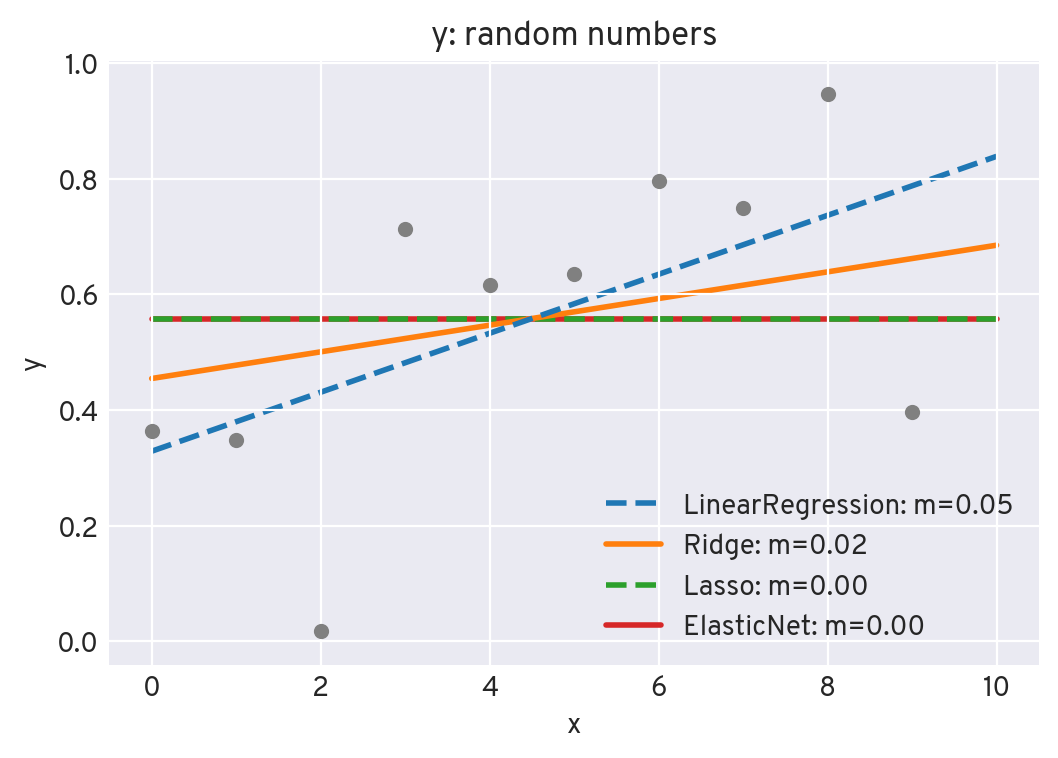

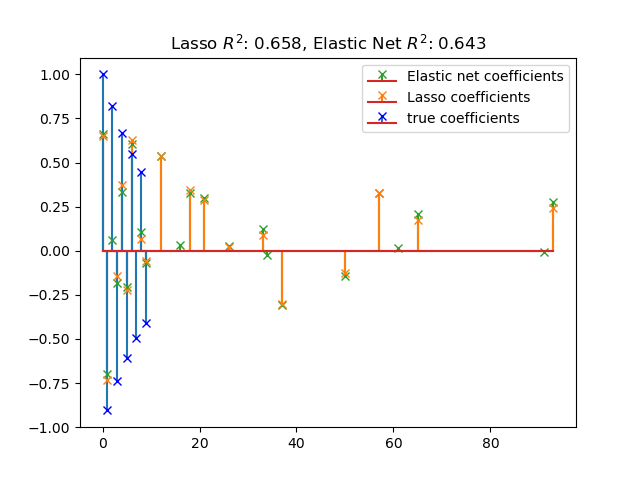

In [88]:
%%shell
colab nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Complete Polynomial Regression.ipynb'

/bin/bash: colab: command not found


CalledProcessError: ignored